In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import keras
from keras.preprocessing.text import Tokenizer
from keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional,InputLayer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = "/content/drive/MyDrive/CS6890Project/data/training.1600000.processed.noemoticon.csv"

In [ ]:
file = open(data_path, "r")
for line in file:
    print(line)
    break
file.close()

"0","1467810369","Mon Apr 06 22:19:45 PDT 2009","NO_QUERY","_TheSpecialOne_","@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D"



In [ ]:
data = pd.read_csv(data_path, header=None, encoding = "ISO-8859-1")
data.columns = ["target", "id", "date", "flag", "user", "text"]

In [ ]:
data.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
data.dtypes

target     int64
id         int64
date      object
flag      object
user      object
text      object
dtype: object

In [ ]:
X=np.array(data['text'])
Y=np.array(data['target'])

# Set Y=1 for Positive Tweets
Y[Y==4]=1

In [ ]:
index = 1897  
print(X[index])

Loves what #drupal file framework module could do, but is sick of Bitcache errors making it impossible to upload files 


#With Unprocessed Data

In [ ]:
tokenizer = Tokenizer(filters='@')
tokenizer.fit_on_texts(X)
print('No. of distinct tokens = '+str(len(tokenizer.word_index)))

No. of distinct tokens = 1185412


In [ ]:
max_vocab=50000

In [ ]:
tokenizer = Tokenizer(num_words=max_vocab,filters='@')
tokenizer.fit_on_texts(X)

In [ ]:
X_vectorized=tokenizer.texts_to_sequences(X)

In [ ]:
max_length=20
X_pad = keras.preprocessing.sequence.pad_sequences(X_vectorized,max_length,padding='post',truncating='post')
print(X_pad.shape)

(1600000, 20)


In [ ]:
def tokenize(X):
  """
  Tokenize the data using nltk
  """
  treebank = nltk.tokenize.TreebankWordTokenizer()
  X_tokenized=[treebank.tokenize(sentence) for sentence in X]  
  return X_tokenized

In [ ]:
index  = 123  
X_tokenized = tokenize(X)

print('\nOriginal :')
print(X[index])
print('\nTokenized :')
print(X_tokenized[index])
print('\nVectorized :')
print(X_vectorized[index])
print('\nPadded :')
print(X_pad[index])



Original :
I am in pain. My back and sides hurt. Not to mention crying is made of fail. 

Tokenized :
['I', 'am', 'in', 'pain.', 'My', 'back', 'and', 'sides', 'hurt.', 'Not', 'to', 'mention', 'crying', 'is', 'made', 'of', 'fail', '.']

Vectorized :
[1, 57, 10, 2588, 5, 48, 6, 8826, 2898, 25, 2, 1418, 1086, 8, 187, 12, 2288]

Padded :
[   1   57   10 2588    5   48    6 8826 2898   25    2 1418 1086    8
  187   12 2288    0    0    0]


In [ ]:
np.random.seed(42)

model_1 = keras.models.Sequential(name='model1')
model_1.add(InputLayer(input_shape=(20,),name = 'Integer_Encoding'))
model_1.add(Embedding(max_vocab, 100,input_length=20,mask_zero=True,name='100D_Encoding',trainable=False))
model_1.add(Bidirectional(LSTM(64,name='LSTM'),name='Bidirectional_RNN'))
model_1.add(Dropout(0.5,name='Regularizer'))
model_1.add(Dense(1, activation='sigmoid',name='Sigmoid_Classifier'))

In [ ]:
import tensorflow as tf 
from tensorflow.keras.utils import plot_model

model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])
model_1

In [ ]:
model_1.summary()

Model: "model1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 100D_Encoding (Embedding)   (None, 20, 100)           5000000   
                                                                 
 Bidirectional_RNN (Bidirect  (None, 128)              84480     
 ional)                                                          
                                                                 
 Regularizer (Dropout)       (None, 128)               0         
                                                                 
 Sigmoid_Classifier (Dense)  (None, 1)                 129       
                                                                 
Total params: 5,084,609
Trainable params: 84,609
Non-trainable params: 5,000,000
_________________________________________________________________


In [ ]:
from tensorflow.keras.utils import plot_model

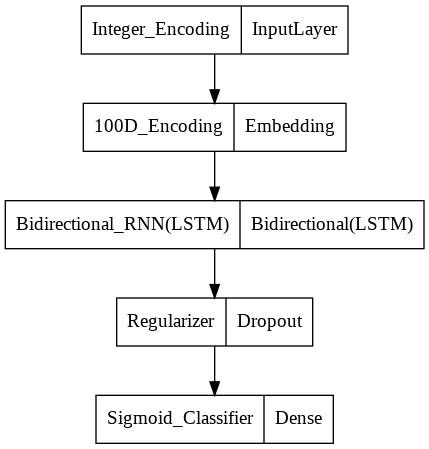

In [ ]:
plot_model(model_1,to_file='model_1.png')

In [ ]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split (X_pad,Y.reshape(Y.shape[0],1),test_size=0.30)

print(len(X_train))
print(len(X_test))
print(len(Y_train))
print(len(Y_test))

1120000
480000
1120000
480000


In [ ]:
history_model_1 = model_1.fit(X_train,Y_train,batch_size=1024,epochs=25,validation_split=0.30)

Epoch 1/25
766/766 [==============================] - 333s 423ms/step - loss: 0.6468 - accuracy: 0.6242 - val_loss: 0.6278 - val_accuracy: 0.6454
Epoch 2/25
766/766 [==============================] - 329s 430ms/step - loss: 0.6167 - accuracy: 0.6570 - val_loss: 0.5965 - val_accuracy: 0.6775
Epoch 3/25
766/766 [==============================] - 325s 424ms/step - loss: 0.5842 - accuracy: 0.6887 - val_loss: 0.5643 - val_accuracy: 0.7050
Epoch 4/25
766/766 [==============================] - 321s 419ms/step - loss: 0.5600 - accuracy: 0.7089 - val_loss: 0.5662 - val_accuracy: 0.7016
Epoch 5/25
766/766 [==============================] - 321s 420ms/step - loss: 0.5455 - accuracy: 0.7208 - val_loss: 0.5351 - val_accuracy: 0.7275
Epoch 6/25
766/766 [==============================] - 323s 422ms/step - loss: 0.5348 - accuracy: 0.7283 - val_loss: 0.5259 - val_accuracy: 0.7344
Epoch 7/25
766/766 [==============================] - 326s 426ms/step - loss: 0.5265 - accuracy: 0.7345 - val_loss: 0.5214 -

In [ ]:
model_1.evaluate(X_test,Y_test)

15000/15000 [==============================] - 152s 10ms/step - loss: 0.4813 - accuracy: 0.7673


[0.4812614619731903, 0.76725834608078]

#Data pre-processing

In [ ]:
def tokenize(X):
  """
  Tokenize the data using nltk
  """
  treebank = nltk.tokenize.TreebankWordTokenizer()
  X_tokenized=[treebank.tokenize(sentence) for sentence in X]  
  return X_tokenized

def remove_stopwords(X):
  """
  Remove Stopwords using nltk
  """
  stop=nltk.corpus.stopwords.words('english') + ['@']
  X_no_stopwords = []
  for sentence in X:
    temp = [word for word in sentence if not word in stop]
    X_no_stopwords.append(temp) 

  return X_no_stopwords

In [ ]:
def get_wordnet_pos(treebank_tag):
        """
        return WORDNET POS compliance to WORDENT lemmatization (a,n,r,v) 
        """
        if treebank_tag.startswith('J'):                #returns 'a' if it's an adjective
            return 'a'
        elif treebank_tag.startswith('V'):              #returns 'v' if it's a verb
            return 'v'
        elif treebank_tag.startswith('N'):              #returns 'n' if it's a noun
            return 'n'
        elif treebank_tag.startswith('R'):              #returns 'r' if it's an adverb
            return 'r'
        else:
            return 'n'

In [ ]:
def stem(X,type='porter'):
  """
  Stemming using nltk
  type = 'Porter','Snowball','Lancaster'
  """ 
  if type == 'porter':
    stemmer= nltk.stem.PorterStemmer()
  elif type == 'snowball':
    stemmer = nltk.stem.SnowballStemmer()
  elif type == 'lancaster':
    stemmer = nltk.stem.LancasterStemmer()    
  X_stemmed = []
  for sentence in X:
    temp = [stemmer.stem(word) for word in sentence]
    X_stemmed.append(temp)

  return X_stemmed 


def lemmatize(X):
  """
  Lemmatize words using corresponding POS tag
  """
  lemmatizer = nltk.stem.WordNetLemmatizer()
  X_pos = []
  X_lemmatized = []
  for sentence in X :
    temp = nltk.pos_tag(sentence)
    X_pos.append(temp)  
  for sentence in X_pos :
    temp = [ lemmatizer.lemmatize(word[0],pos=get_wordnet_pos(word[1])) for word in sentence]
    X_lemmatized.append(temp)  

  return X_lemmatized    

In [ ]:
X_tokenized = tokenize(X)
X_no_stopwords = remove_stopwords(X_tokenized)
X_lemmatized = lemmatize(X_no_stopwords)
X_clean = []
for sentence in X_lemmatized:
  temp = " ".join(sentence)
  X_clean.append(temp)

In [ ]:
tokenizer = Tokenizer(filters='@')
tokenizer.fit_on_texts(X_clean)
print('No. of distinct tokens = '+str(len(tokenizer.word_index)))

No. of distinct tokens = 837032


In [ ]:
max_vocab=50000

In [ ]:
tokenizer = Tokenizer(num_words=max_vocab,filters='@')
tokenizer.fit_on_texts(X_clean)

In [ ]:
# vectorize
X_clean_vectorized=tokenizer.texts_to_sequences(X_clean)

In [ ]:
max_length=20

In [ ]:
X_clean_pad = keras.preprocessing.sequence.pad_sequences(X_clean_vectorized,max_length,padding='post',truncating='post')
print(X_clean_pad.shape)

(1600000, 20)


In [ ]:
index  = 1000  

print('\nOriginal :')
print(X[index])
print('\nTokenized :')
print(X_tokenized[index])
print('\nStopwords removed :')
print(X_no_stopwords[index])
print('\nPOS tagged :')
print(nltk.pos_tag(X_no_stopwords[index]))
print('\nLemmatized :')
print(X_lemmatized[index])
print('\nClean :')
print(X_clean[index])
print('\nVectorized :')
print(X_clean_vectorized[index])
print('\nPadded :')
print(X_clean_pad[index])


Original :
@JonathanRKnight @silver_tulip27 Um, that would be a hell no to the fugly poker dog pants on the cruise!  Hi Jonathan, sorry I missed you 

Tokenized :
['@', 'JonathanRKnight', '@', 'silver_tulip27', 'Um', ',', 'that', 'would', 'be', 'a', 'hell', 'no', 'to', 'the', 'fugly', 'poker', 'dog', 'pants', 'on', 'the', 'cruise', '!', 'Hi', 'Jonathan', ',', 'sorry', 'I', 'missed', 'you']

Stopwords removed :
['JonathanRKnight', 'silver_tulip27', 'Um', ',', 'would', 'hell', 'fugly', 'poker', 'dog', 'pants', 'cruise', '!', 'Hi', 'Jonathan', ',', 'sorry', 'I', 'missed']

POS tagged :
[('JonathanRKnight', 'NNP'), ('silver_tulip27', 'NN'), ('Um', 'NNP'), (',', ','), ('would', 'MD'), ('hell', 'VB'), ('fugly', 'RB'), ('poker', 'NN'), ('dog', 'NN'), ('pants', 'NNS'), ('cruise', 'NN'), ('!', '.'), ('Hi', 'NNP'), ('Jonathan', 'NNP'), (',', ','), ('sorry', 'NN'), ('I', 'PRP'), ('missed', 'VBD')]

Lemmatized :
['JonathanRKnight', 'silver_tulip27', 'Um', ',', 'would', 'hell', 'fugly', 'poker', '

#Word Embeddings

**Using pre-trained Word Embeddings (GloVe)**

In [ ]:
embedding_path = "/content/drive/MyDrive/CS6890Project/data/glove.6B.100d.txt"

In [ ]:
emb = dict()
f = open(embedding_path)
for line in f:
	values = line.split()
	word = values[0]
	cf = np.asarray(values[1:], dtype='float32')
	emb[word] = cf
f.close()

In [ ]:
embedding_matrix = np.zeros((max_vocab, 100))
for i in range(1,max_vocab):
	vector = emb.get(tokenizer.index_word[i])
	if vector is not None:
		embedding_matrix[i] = vector

In [ ]:
import tensorflow as tf 

In [ ]:
np.random.seed(42)

model_2 = keras.models.Sequential(name='model2')

model_2.add(InputLayer(input_shape=(20,),name='Integer_Encoding_after_Preprocessing'))
model_2.add(Embedding(max_vocab, 100, weights=[embedding_matrix], input_length=max_length,mask_zero=True,name='Pretrained_GloVe_100D', trainable=False))
model_2.add(Bidirectional(LSTM(64,name='LSTM'),name='Bidirectional_RNN'))
model_2.add(Dropout(0.5,name='Regularizer'))
model_2.add(Dense(1, activation='sigmoid',name='Sigmoid_Classifier'))

In [ ]:
model_2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss='binary_crossentropy',
                metrics=['accuracy'])

In [ ]:
model_2.summary()

Model: "model2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Pretrained_GloVe_100D (Embe  (None, 20, 100)          5000000   
 dding)                                                          
                                                                 
 Bidirectional_RNN (Bidirect  (None, 128)              84480     
 ional)                                                          
                                                                 
 Regularizer (Dropout)       (None, 128)               0         
                                                                 
 Sigmoid_Classifier (Dense)  (None, 1)                 129       
                                                                 
Total params: 5,084,609
Trainable params: 84,609
Non-trainable params: 5,000,000
_________________________________________________________________


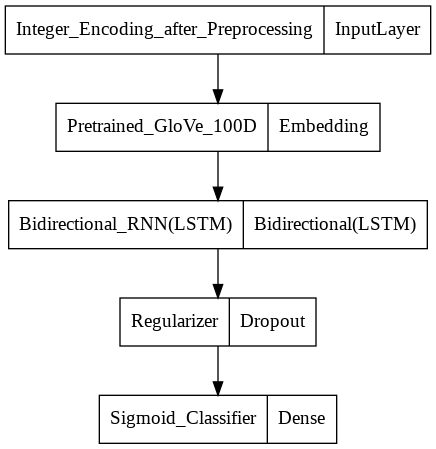

In [ ]:
plot_model(model_2,to_file='model_1.png')

In [ ]:
np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split (X_clean_pad,Y.reshape(Y.shape[0],1),test_size=0.30)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1120000, 20)
(480000, 20)
(1120000, 1)
(480000, 1)


In [ ]:
# Train the model
history_model_2 = model_2.fit(X_train,Y_train,batch_size=1024,epochs=25,validation_split=0.30)

Epoch 1/25
766/766 [==============================] - 327s 416ms/step - loss: 0.5408 - accuracy: 0.7236 - val_loss: 0.5019 - val_accuracy: 0.7524
Epoch 2/25
766/766 [==============================] - 319s 417ms/step - loss: 0.4954 - accuracy: 0.7580 - val_loss: 0.4839 - val_accuracy: 0.7636
Epoch 3/25
766/766 [==============================] - 325s 425ms/step - loss: 0.4800 - accuracy: 0.7678 - val_loss: 0.4732 - val_accuracy: 0.7717
Epoch 4/25
766/766 [==============================] - 323s 422ms/step - loss: 0.4699 - accuracy: 0.7742 - val_loss: 0.4669 - val_accuracy: 0.7764
Epoch 5/25
766/766 [==============================] - 315s 411ms/step - loss: 0.4627 - accuracy: 0.7793 - val_loss: 0.4623 - val_accuracy: 0.7781
Epoch 6/25
766/766 [==============================] - 317s 414ms/step - loss: 0.4571 - accuracy: 0.7827 - val_loss: 0.4572 - val_accuracy: 0.7817
Epoch 7/25
766/766 [==============================] - 319s 416ms/step - loss: 0.4525 - accuracy: 0.7859 - val_loss: 0.4557 -

In [ ]:
model_2.evaluate(X_test,Y_test)

15000/15000 [==============================] - 146s 10ms/step - loss: 0.4534 - accuracy: 0.7895


[0.4534456729888916, 0.7895374894142151]

In [ ]:
n_epochs=len(history_model_1.history['loss'])
e = list(range(1,n_epochs+1))

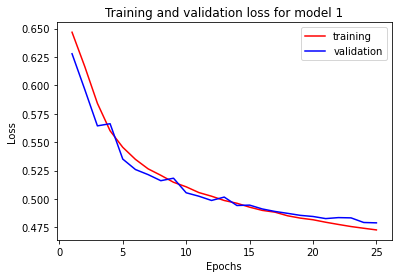

In [ ]:
# Training and Validation loss

plt.title('Training and validation loss for model 1')
plt.plot(e,history_model_1.history['loss'],'r',label='training')
plt.plot(e,history_model_1.history['val_loss'],'b',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

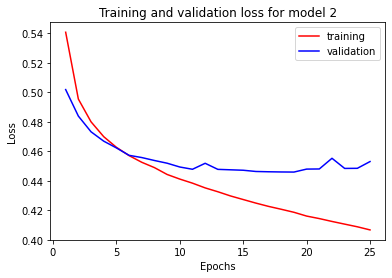

In [ ]:
# Training Loss

plt.title('Training and validation loss for model 2')
plt.plot(e,history_model_2.history['loss'],'r',label='training')
plt.plot(e,history_model_2.history['val_loss'],'b',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

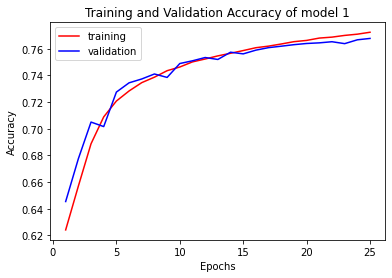

In [ ]:
# Training and validation Accuracy

plt.title('Training and Validation Accuracy of model 1')
plt.plot(e,history_model_1.history['accuracy'],'r',label='training')
plt.plot(e,history_model_1.history['val_accuracy'],'b',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

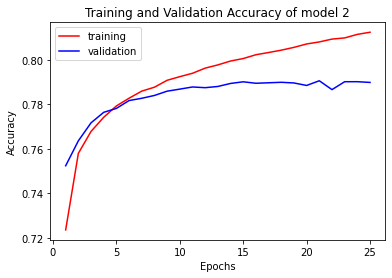

In [ ]:
# Training and validation Accuracy

plt.title('Training and Validation Accuracy of model 2')
plt.plot(e,history_model_2.history['accuracy'],'r',label='training')
plt.plot(e,history_model_2.history['val_accuracy'],'b',label='validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()